<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

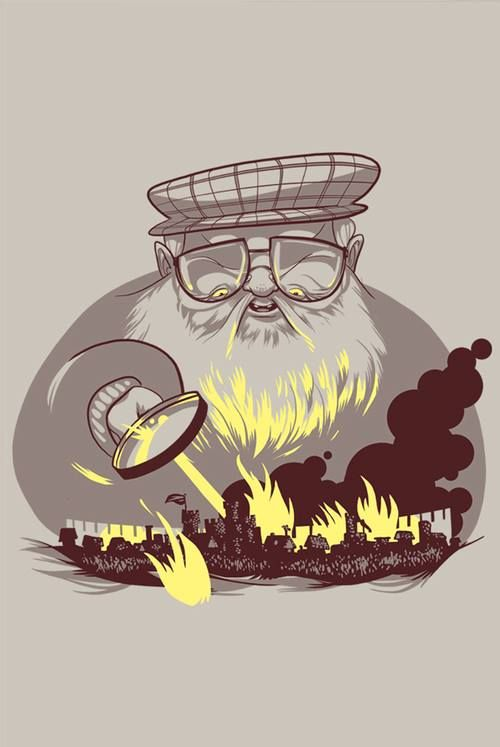

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [230]:
pip install --upgrade --no-cache-dir gdown

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: gdown in d:\itmo\python_curce\anna_mats\.venv\lib\site-packages (5.2.0)




[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [231]:
import gdown
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v 

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: D:\itmo\python_curce\anna_mats\game_of_thrones_test.csv

  0%|          | 0.00/37.3k [00:00<?, ?B/s]
100%|##########| 37.3k/37.3k [00:00<00:00, 571kB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: D:\itmo\python_curce\anna_mats\game_of_thrones_train.csv

  0%|          | 0.00/138k [00:00<?, ?B/s]
100%|##########| 138k/138k [00:00<00:00, 794kB/s]
100%|##########| 138k/138k [00:00<00:00, 794kB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [351]:
# ...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [469]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col = 'S.No')
data_train = pd.read_csv('game_of_thrones_train.csv', index_col = 'S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [470]:
data_train = data_train.loc[data_train['age'] > 0]
data_train = data_train[data_train['isAlive'].notna()]

In [489]:
# len(list(data_train.loc[data_train['isAlive'] == 1].isnull().sum(axis = 1).rename('a').sort_values(ascending = False)))

189

In [446]:
def process_string_features(df: pd.DataFrame, string_features: list[str]) -> pd.DataFrame:
    for feature in string_features:
        df[feature] = df[feature].fillna('unknown')
        df[feature] = df[feature].str.lower()
    return df

In [447]:
def process_numeric_features(df: pd.DataFrame, numeric_features: list[str]) -> pd.DataFrame:
    for feature in numeric_features:
        df[feature] = df[feature].fillna(df[feature].median())
    return df

In [448]:
def process_binary_features(df: pd.DataFrame, binary_features: list[str]) -> pd.DataFrame:
    for feature in binary_features:
        df[feature] = df[feature].fillna(0.5)
    return df

In [449]:
string_features = ['title', 'culture', 'house', 'spouse']
numeric_features = ['age', 'numDeadRelations', 'popularity']
binary_features = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveMother', 'isAliveFather', 'isAliveSpouse',
                   'isAliveHeir','isMarried', 'isNoble']

In [450]:
data_train = process_string_features(data_train, string_features)

In [451]:
# остальная обработка будет производиться автоматически в функции preprocess_all_data
# чтобы избежать копипасты и соответственно ошибок при обработке test_data

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [452]:
# создаются в preprocess_all_data

In [453]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [454]:
cult_infl = data_train.groupby('culture')['isAlive'].agg(['sum', 'count'])
cult_infl['percent'] = cult_infl['sum'] / cult_infl['count']

<BarContainer object of 22 artists>

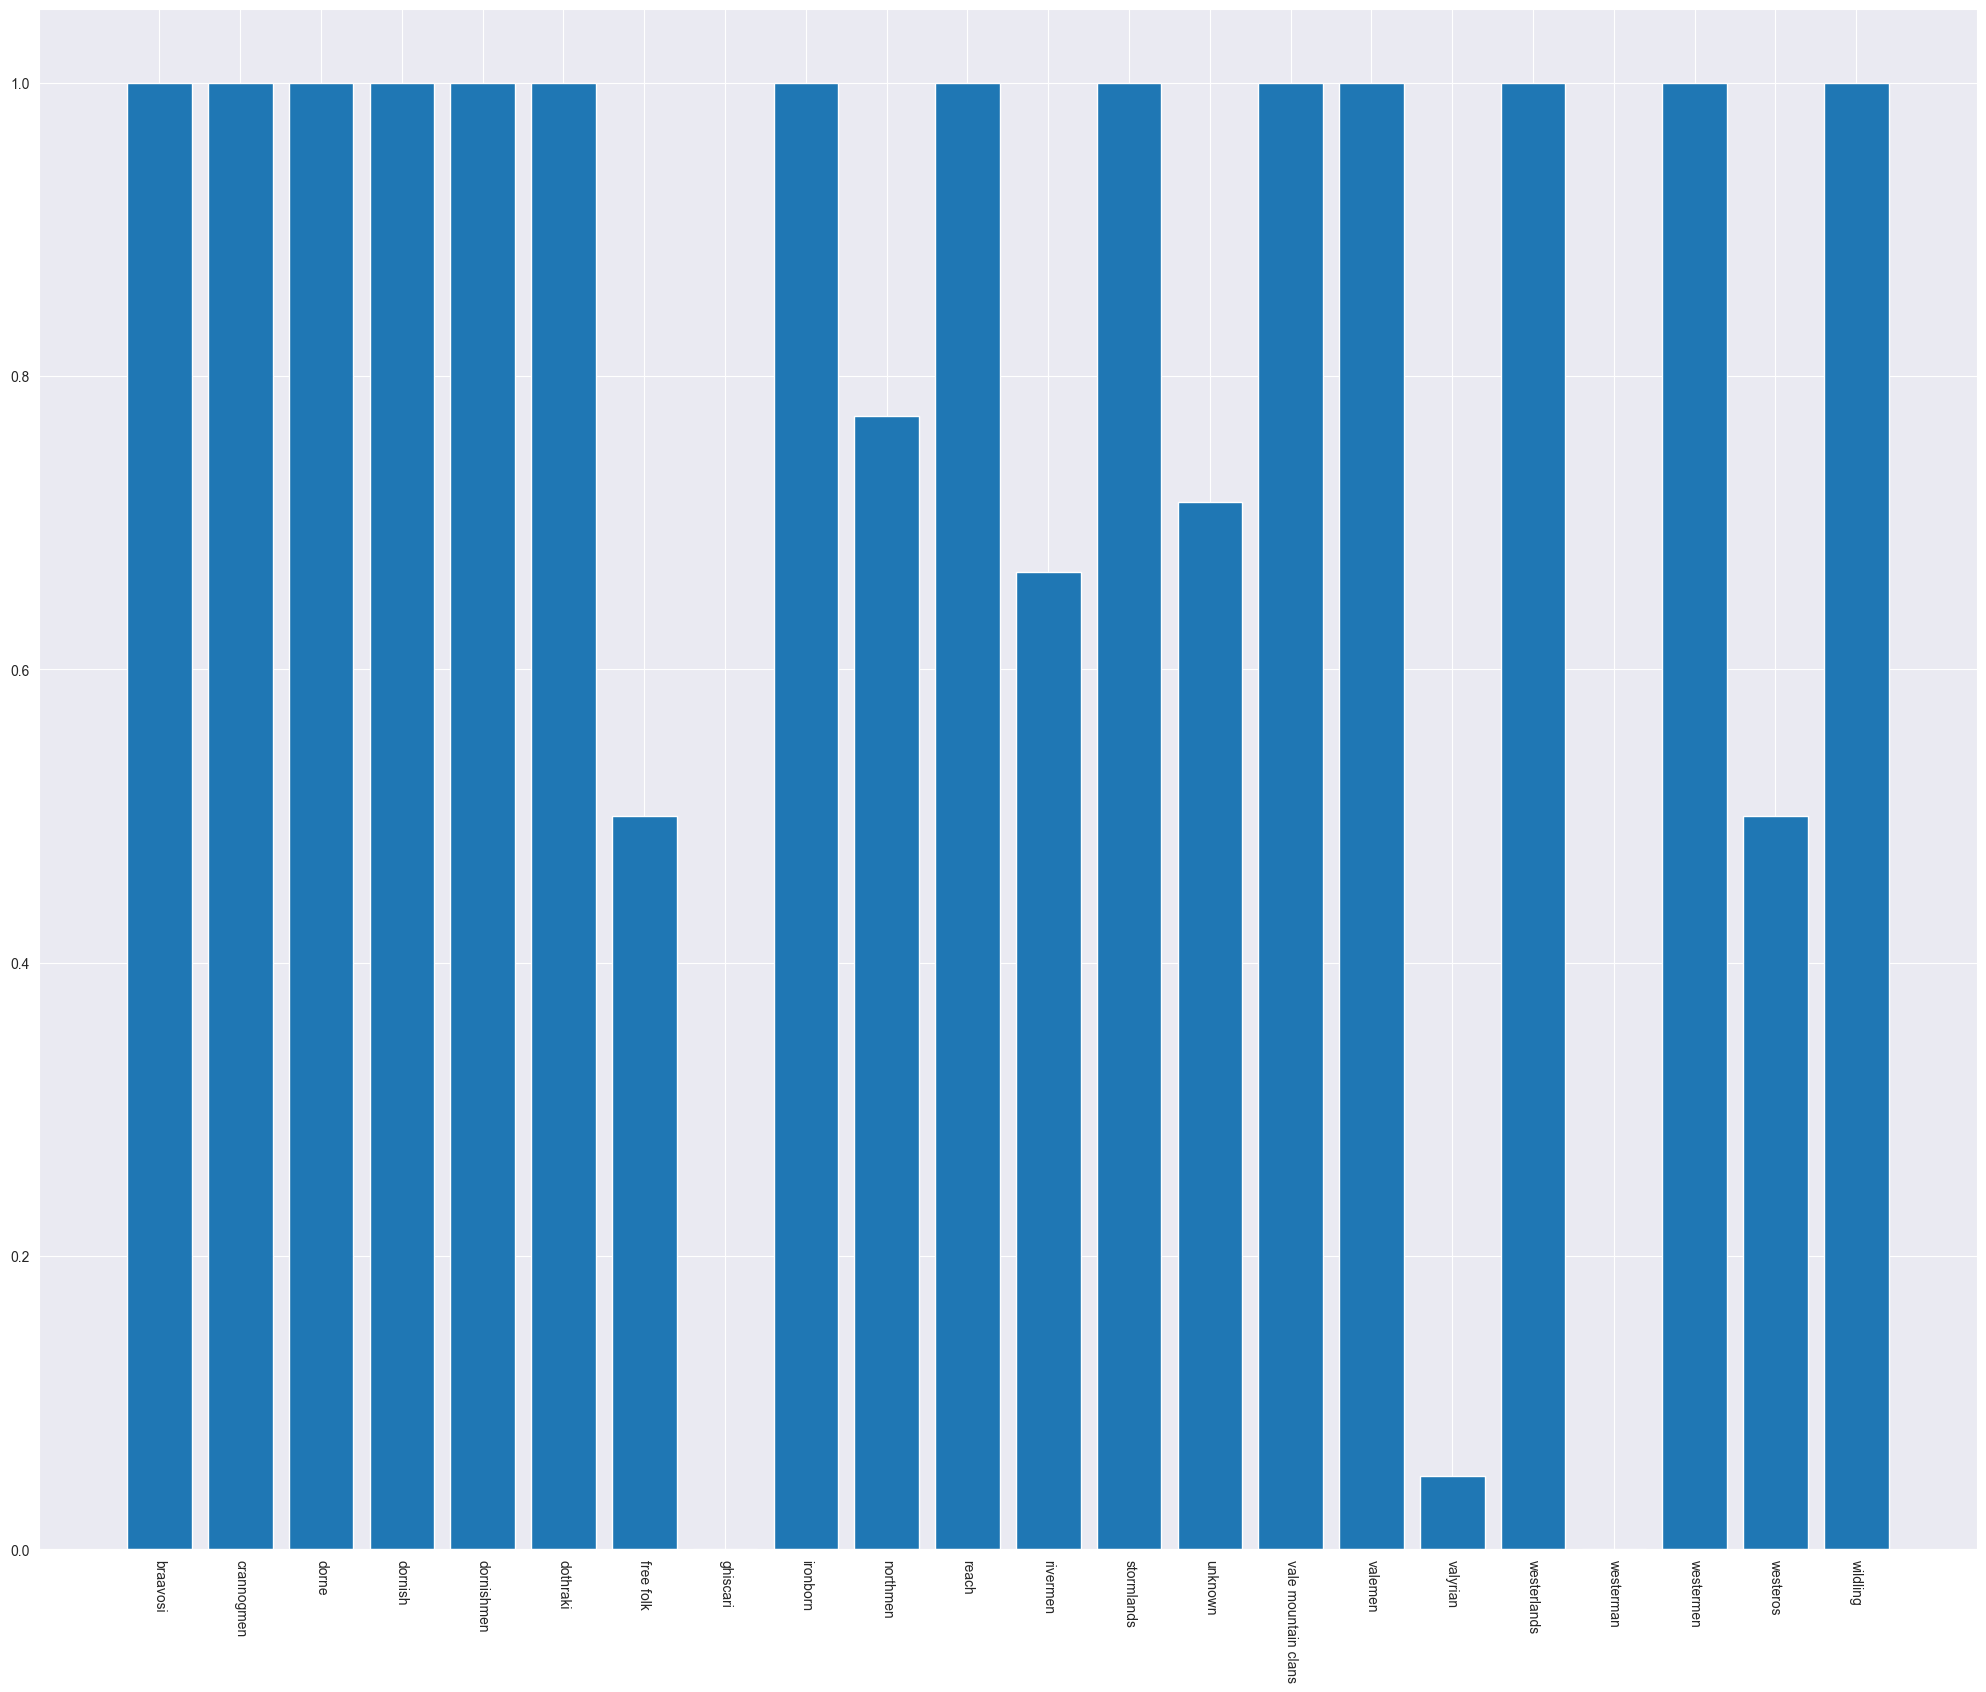

In [455]:
plt.figure(figsize = (25, 20))
plt.xticks(rotation= -90)
plt.bar(cult_infl.index, cult_infl['percent'])

In [456]:
alive_cultures = cult_infl[cult_infl['percent'] > 0.8].index
medium_alive_cultures = cult_infl[(cult_infl['percent'] <= 0.8) & (cult_infl['percent'] >= 0.2)].index
low_alive_cultures = cult_infl[cult_infl['percent'] <= 0.2].index

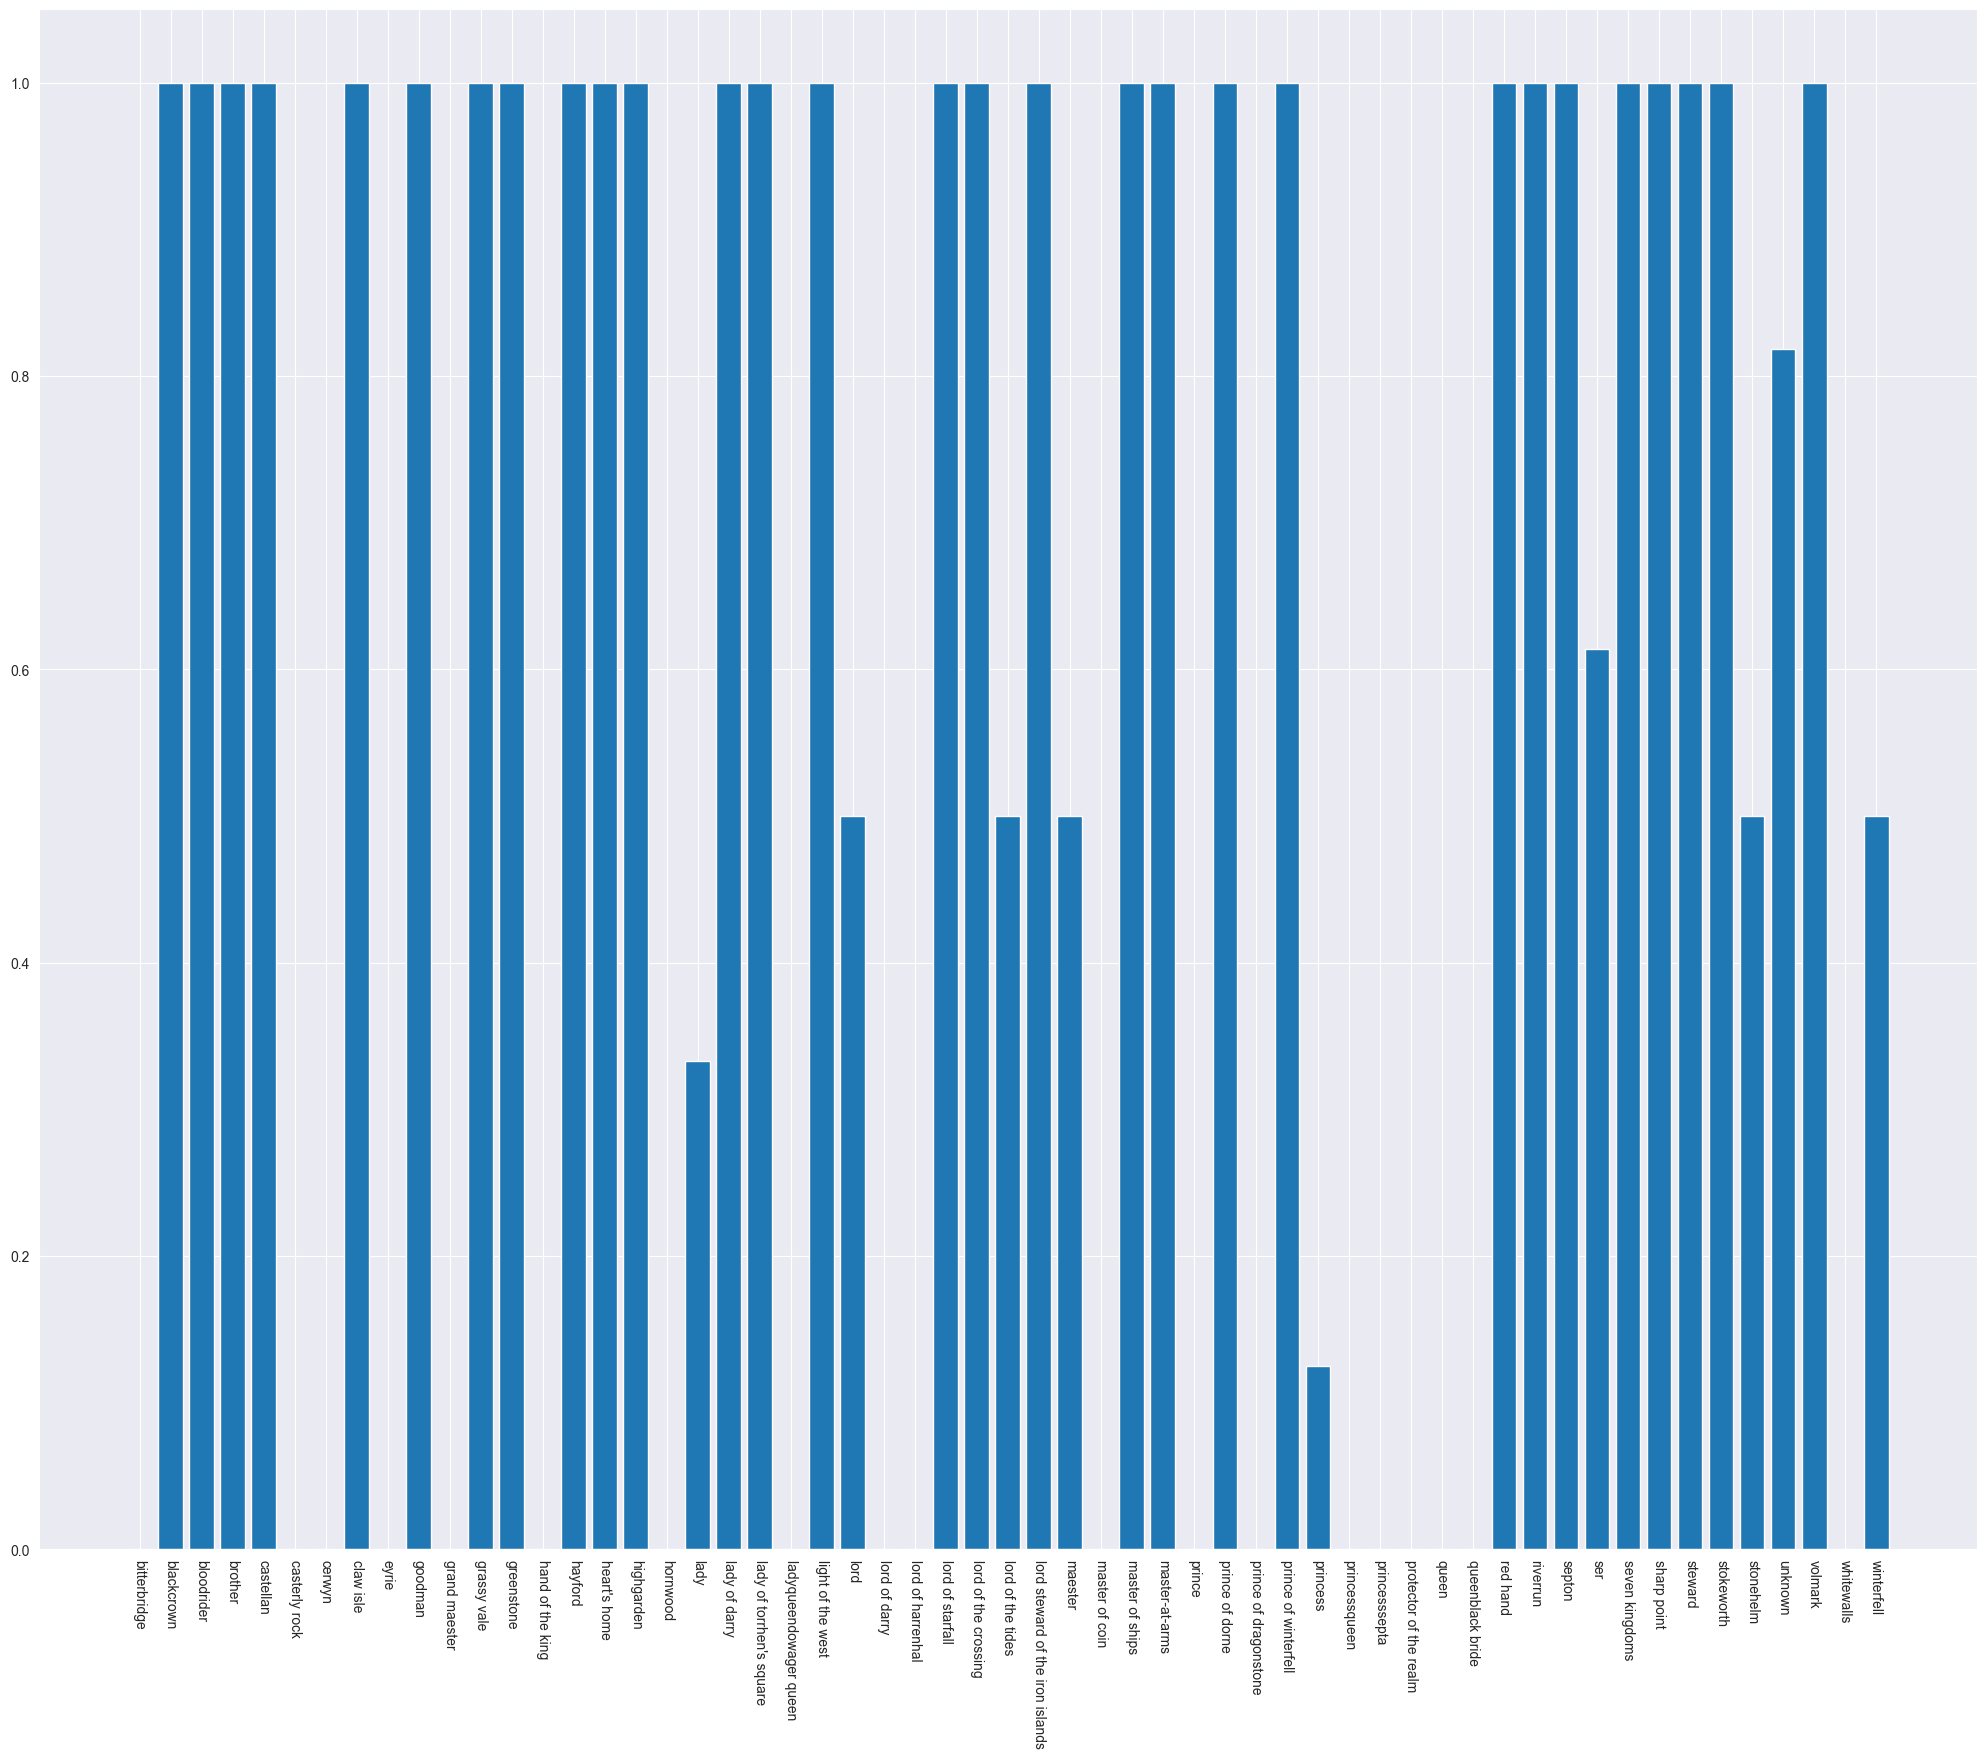

In [457]:
cult_infl = data_train.groupby('title')['isAlive'].agg(['sum', 'count'])
cult_infl['percent'] = cult_infl['sum'] / cult_infl['count']
plt.figure(figsize = (25, 20))
plt.xticks(rotation= -90)
plt.bar(cult_infl.index, cult_infl['percent'])
alive_title = cult_infl[cult_infl['percent'] > 0.8].index
medium_alive_title = cult_infl[(cult_infl['percent'] <= 0.8) & (cult_infl['percent'] >= 0.2)].index
low_alive_title = cult_infl[cult_infl['percent'] <= 0.2].index

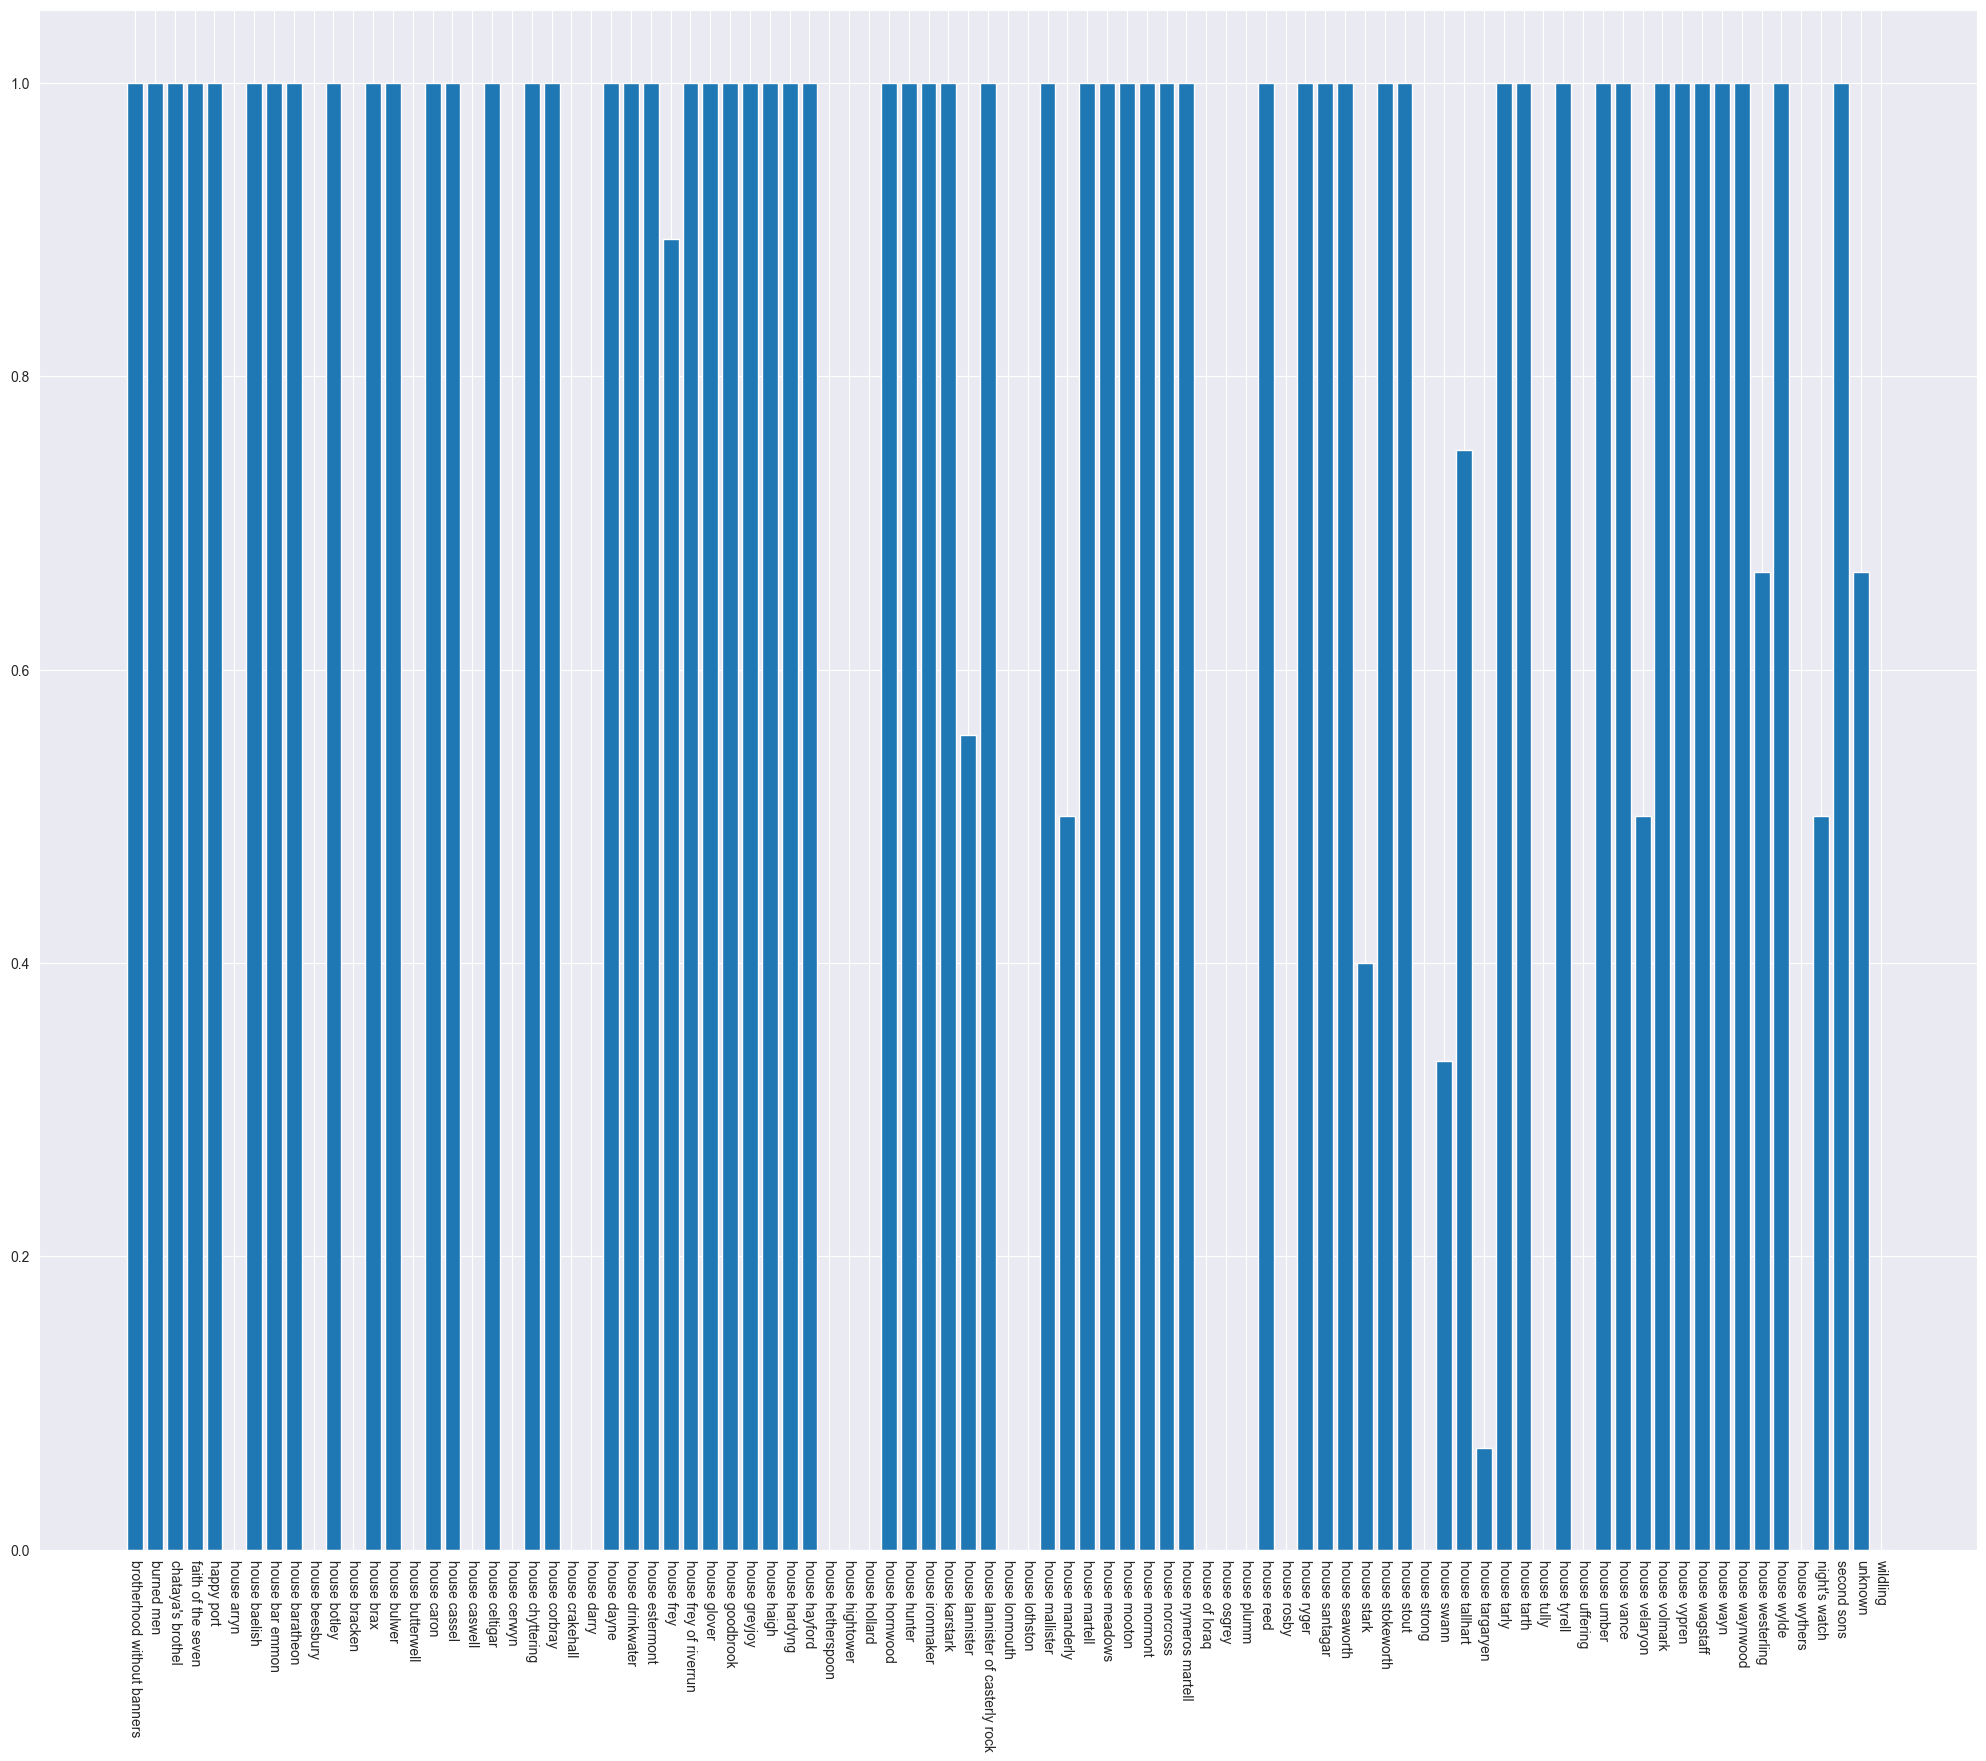

In [458]:
cult_infl = data_train.groupby('house')['isAlive'].agg(['sum', 'count'])
cult_infl['percent'] = cult_infl['sum'] / cult_infl['count']
plt.figure(figsize = (25, 20))
plt.xticks(rotation= -90)
plt.bar(cult_infl.index, cult_infl['percent'])
alive_house = cult_infl[cult_infl['percent'] > 0.6].index
low_alive_house = cult_infl[cult_infl['percent'] <= 0.6].index

In [459]:
def preprocess_all_data(data):
    data = data.drop(columns = ['mother', 'father', 'heir'])
    data.drop(columns = ['dateOfBirth'], inplace = True)
    data = process_string_features(data, string_features)
    data = process_numeric_features(data, numeric_features)
    data = process_binary_features(data, binary_features)
    data['is_popular'] = data['popularity'].apply(lambda x : x > 0.5)
    data.drop(columns = ['popularity'], inplace = True)
    data['has_dead_rels'] = data['numDeadRelations'].apply(lambda x : x > 0)
    data.drop(columns = ['numDeadRelations'], inplace = True)
    for key, values in cult.items():
        data['culture'] = data['culture'].replace(values, key)
    data.drop(columns =['isAliveMother'], inplace = True)
    data.drop(columns =['isAliveFather'], inplace = True)
    data.drop(columns =['isAliveHeir'], inplace = True)
    data['isOld'] = data['age'] > 60
    data.drop(columns = ['age'], inplace = True)
    data['title'] = data['title'].replace(alive_title, 1)
    data['title'] = data['title'].replace(medium_alive_title, 0.5)
    data['title'] = data['title'].replace(low_alive_title, 0.3)
    data['title'] = pd.to_numeric(data['title'], errors='coerce').fillna(0.4)
    data['house'] = data['house'].replace(alive_house, 1)
    data['house'] = data['house'].replace(low_alive_house, 0.3)
    data['house'] = pd.to_numeric(data['house'], errors='coerce').fillna(0.5)
    data.drop(columns = ['spouse'], inplace = True)
    return data

In [460]:
data_train = preprocess_all_data(data_train)

C:\Users\annam\AppData\Local\Temp\ipykernel_18264\1752538716.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['title'] = data['title'].replace(low_alive_title, 0.3)
C:\Users\annam\AppData\Local\Temp\ipykernel_18264\1752538716.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['house'] = data['house'].replace(low_alive_house, 0.3)


In [461]:
data_train

,name,title,male,culture,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,isAlive,is_popular,has_dead_rels,isOld
S.No,,,,,,,,,,,,,,,,,
2,Walder Frey,1.0,1,rivermen,1.0,1,1,1,1,1,1.0,1,1,1,True,True,True
4,Aemma Arryn,0.3,0,unknown,0.3,0,0,0,0,0,0.0,1,1,0,False,False,False
5,Sylva Santagar,1.0,0,Dornish,1.0,0,0,0,1,0,1.0,1,1,1,False,False,False
7,Valarr Targaryen,0.3,1,valyrian,0.3,0,0,0,0,0,1.0,1,1,0,False,False,False
23,Willow Heddle,1.0,0,unknown,1.0,0,0,0,1,0,0.5,0,0,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,Lyanna Stark,1.0,1,Northmen,0.3,1,1,1,0,1,0.5,0,0,0,False,True,False
1546,Mace Tyrell,1.0,1,unknown,1.0,1,1,1,1,1,1.0,1,1,1,True,True,False
1551,Marillion,1.0,1,unknown,1.0,1,1,1,1,0,0.5,0,0,0,False,False,False


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

(array([ 88.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 189.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

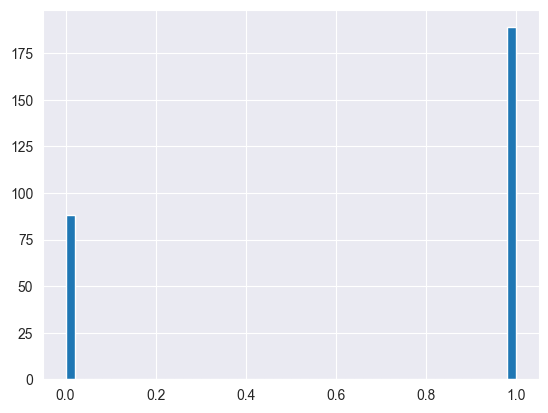

In [462]:
plt.hist(data_train['isAlive'], bins = 50)

In [463]:
data_train.loc[data_train['isAlive'] == False].shape

(88, 17)

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [424]:
data_train

name              object
title            float64
male               int64
culture           object
house            float64
book1              int64
book2              int64
book3              int64
book4              int64
book5              int64
isAliveSpouse    float64
isMarried          int64
isNoble            int64
isAlive            int64
is_popular          bool
has_dead_rels       bool
isOld               bool
dtype: object

In [425]:
X = data_train.drop(columns = ['isAlive', 'name'])
y = data_train['isAlive']

In [426]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), ['culture'])
], remainder='passthrough')
X = column_transformer.fit_transform(X)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [427]:
X

array([[0.0, 0.0, 0.0, ..., True, True, True],
       [0.0, 0.0, 0.0, ..., False, False, False],
       [0.0, 1.0, 0.0, ..., False, False, False],
       ...,
       [0.0, 0.0, 0.0, ..., False, False, False],
       [0.0, 0.0, 0.0, ..., False, False, False],
       [0.0, 0.0, 0.0, ..., False, False, False]], dtype=object)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [428]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [430]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [431]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [432]:
from sklearn.metrics import accuracy_score

In [433]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8452380952380952


In [435]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Загрузите ваши данные X_train, y_train, X_test, y_test
# ... 

# Шаг 1. Создание модели
# AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=100)
# RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
# GaussianProcessClassifier
gaussian_process = GaussianProcessClassifier()
# GaussianNB
gaussian_nb = GaussianNB()
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# SVC
svc = SVC()
# DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

# Шаг 2. Обучение модели
# AdaBoostClassifier
ada_boost.fit(X_train, y_train)
# RandomForestClassifier
random_forest.fit(X_train, y_train)
# GaussianProcessClassifier
gaussian_process.fit(X_train, y_train)
# GaussianNB
gaussian_nb.fit(X_train, y_train)
# KNeighborsClassifier
knn.fit(X_train, y_train)
# SVC
svc.fit(X_train, y_train)
# DecisionTreeClassifier
decision_tree.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
# AdaBoostClassifier
y_pred_ada_boost = ada_boost.predict(X_test)
print(f"Accuracy for AdaBoost: {accuracy_score(y_test, y_pred_ada_boost)}")
# RandomForestClassifier
y_pred_random_forest = random_forest.predict(X_test)
print(f"Accuracy for Random Forest: {accuracy_score(y_test, y_pred_random_forest)}")
# GaussianProcessClassifier
y_pred_gaussian_process = gaussian_process.predict(X_test)
print(f"Accuracy for Gaussian Process: {accuracy_score(y_test, y_pred_gaussian_process)}")
# GaussianNB
y_pred_gaussian_nb = gaussian_nb.predict(X_test)
print(f"Accuracy for Gaussian Naive Bayes: {accuracy_score(y_test, y_pred_gaussian_nb)}")
# KNeighborsClassifier
y_pred_knn = knn.predict(X_test)
print(f"Accuracy for K-Nearest Neighbors: {accuracy_score(y_test, y_pred_knn)}")
# SVC
y_pred_svc = svc.predict(X_test)
print(f"Accuracy for Support Vector Machine: {accuracy_score(y_test, y_pred_svc)}")
# DecisionTreeClassifier
y_pred_decision_tree = decision_tree.predict(X_test)
print(f"Accuracy for Decision Tree: {accuracy_score(y_test, y_pred_decision_tree)}")


D:\itmo\python_curce\anna_mats\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for AdaBoost: 0.7976190476190477
Accuracy for Random Forest: 0.8095238095238095
Accuracy for Gaussian Process: 0.8333333333333334
Accuracy for Gaussian Naive Bayes: 0.35714285714285715
Accuracy for K-Nearest Neighbors: 0.7857142857142857
Accuracy for Support Vector Machine: 0.8214285714285714
Accuracy for Decision Tree: 0.7976190476190477


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [438]:
# gaussian_pr = GaussianProcessClassifier()
# gaussian_process.fit(X, y)
y_pred = gaussian_process.predict(X)
print(accuracy_score(y, y_pred))

0.9061371841155235


In [398]:
X

array([[0.0, 0.0, 0.0, ..., True, True, True],
       [0.0, 0.0, 0.0, ..., False, False, False],
       [0.0, 1.0, 0.0, ..., False, False, False],
       ...,
       [0.0, 0.0, 0.0, ..., False, False, False],
       [0.0, 0.0, 0.0, ..., False, False, False],
       [0.0, 0.0, 0.0, ..., False, False, False]], dtype=object)

In [439]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col = 'S.No')
data_test = process_string_features(data_test, string_features)
data_test = preprocess_all_data(data_test)
data_test = data_test.drop(columns = ['name'])
data_test = column_transformer.transform(data_test)
data_test
predicted = gaussian_process.predict(data_test)

In [440]:
predicted

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [ ]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [441]:
submission['isAlive'] = predicted

In [442]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [443]:
submission.to_csv("new_submission.csv", index=False)